## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Read the Data file

In [2]:
df = pd.read_csv('data_for_lr.csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


## Data Preprocessing

In [4]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
df.dropna(inplace = True)

### Split train and Test Data

In [6]:
x_train = np.array(df.x[0:500]).reshape(500,1)
y_train = np.array(df.y[0:500]).reshape(500,1)

x_test = np.array(df.x[500:]).reshape(199,1)
y_test = np.array(df.y[500:]).reshape(199,1)

In [7]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((500, 1), (500, 1), (199, 1), (199, 1))

## Linear Regression

### Forward Propagation

f(x) = m*x + c

In [8]:
def forward_propagation(x, parameters):
    m = parameters['m']
    c = parameters['c']
    
    predictions = np.multiply(m,x) + c
    return predictions

### Cost functions

    cf = c(f(x)) = ∑1/2n * (f(x)-y)^2 )


In [9]:
def cost_function(predictions, y):
    cost = np.mean((predictions-y)**2) * 0.5
    
    return cost

### Gradient Descent for Backpropgation
    d(cf) = ∑(f(x)-y) / n
    dm = df * x = [∑(f(x)-y) / n] * x
    dc = df * 1 =  ∑(f(x)-y) / n

In [10]:
def backward_propagation(x,y,predictions):
    
    derivatives = dict()
    
    diff = predictions - y
    
    dm = np.mean(np.multiply(diff, x))
    dc = np.mean(diff)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

### Update Parameters
    m = m-(learning_rate * dm)
    c = c-(learning_rate * dc)

In [11]:
def update_parameters(parameters, derivatives, learning_rate):
    
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    
    return parameters

## Training

In [12]:
def train(x,y, learning_rate, iters):
    
    # Random parameter
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)
    
    # figure
    plt.figure()
    
    loss = []
    
    # iteration
    for i in range(iters):
        
        # forward propagation
        predictions = forward_propagation(x,parameters)
        
        # Cost
        cost = cost_function(predictions,y)
        
        loss.append(cost)
        print(f'Iteratio = {i+1}, Loss = {cost}')
        # plot figure
        fig, ax = plt.subplots()
        ax.plot(x,y, '+', label = 'Real')
        ax.plot(x,predictions, '+', label = 'Predicted')
        
        legend = ax.legend()
        
        plt.plot(x,y, '+', label = 'Real')
        plt.plot(x,predictions, '+', label = 'Predicted')
        plt.show()
        
        # Back propagation
        derivatives = backward_propagation(x,y,predictions)
        
        # Update the parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteratio = 1, Loss = 311.36273536732665


<Figure size 432x288 with 0 Axes>

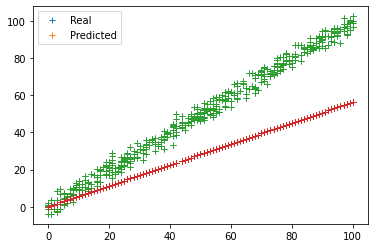

Iteratio = 2, Loss = 143.40859061177522


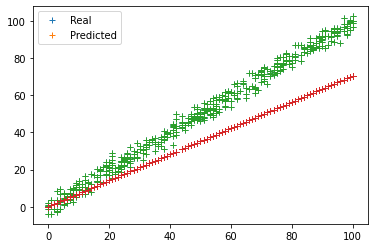

Iteratio = 3, Loss = 67.20760876337023


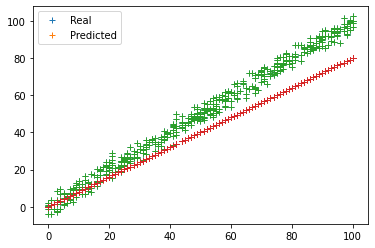

Iteratio = 4, Loss = 32.635138555539356


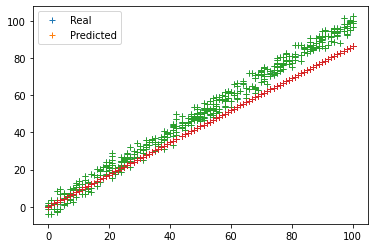

Iteratio = 5, Loss = 16.9495701885094


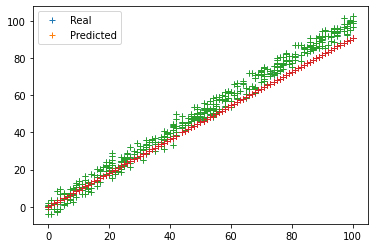

Iteratio = 6, Loss = 9.833010106578733


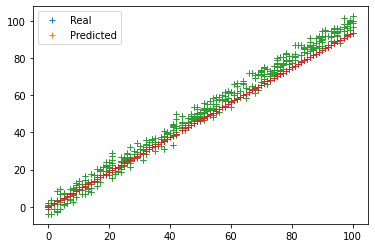

Iteratio = 7, Loss = 6.6042185750015125


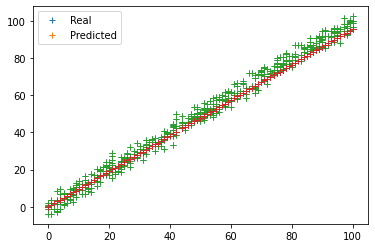

Iteratio = 8, Loss = 5.139311940989445


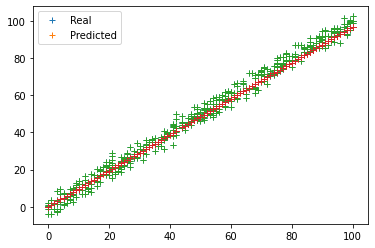

Iteratio = 9, Loss = 4.4746818387713985


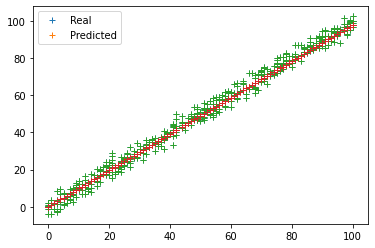

Iteratio = 10, Loss = 4.173138085464697


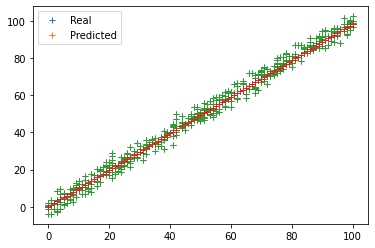

Iteratio = 11, Loss = 4.036327010845586


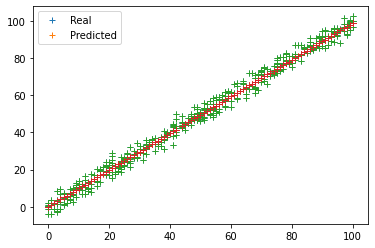

Iteratio = 12, Loss = 3.9742553350288534


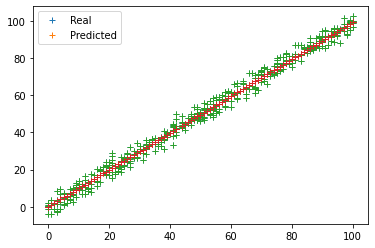

Iteratio = 13, Loss = 3.9460930072503135


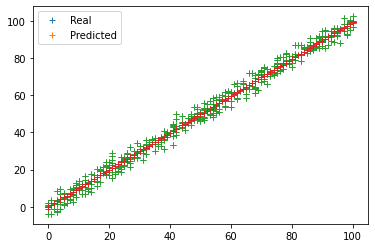

Iteratio = 14, Loss = 3.9333153882532024


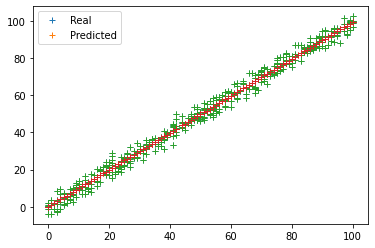

Iteratio = 15, Loss = 3.9275178286880754


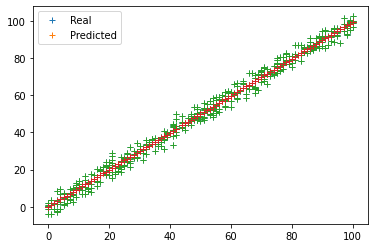

Iteratio = 16, Loss = 3.9248871298357506


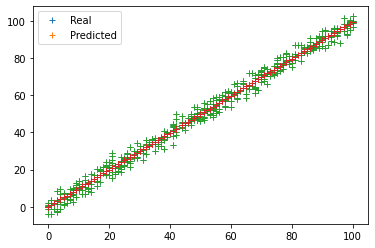

Iteratio = 17, Loss = 3.9236932392136823


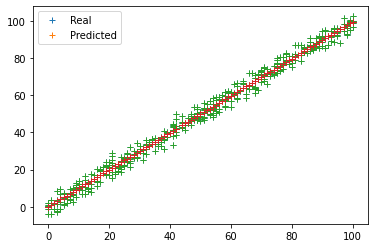

Iteratio = 18, Loss = 3.923151230094255


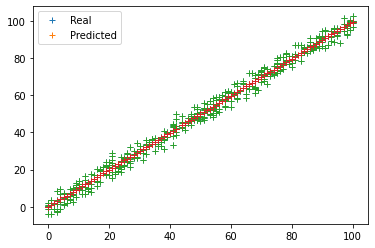

Iteratio = 19, Loss = 3.9229049803517366


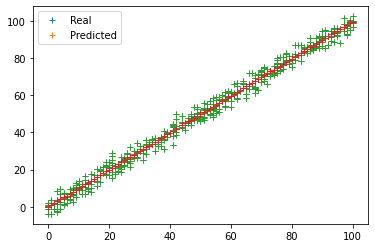

Iteratio = 20, Loss = 3.9227929169832225


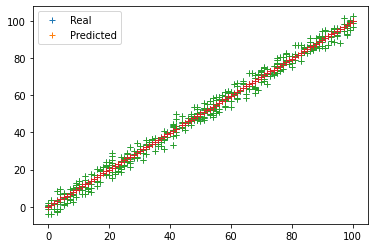

Iteratio = 21, Loss = 3.9227417341383317


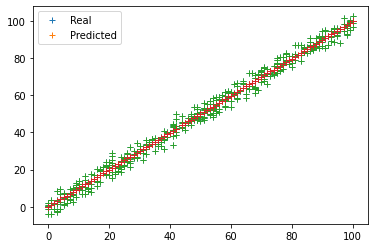

Iteratio = 22, Loss = 3.922718172871547


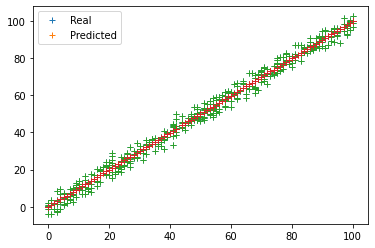

Iteratio = 23, Loss = 3.9227071435624485


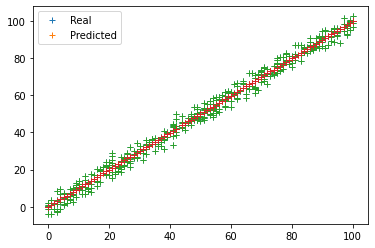

Iteratio = 24, Loss = 3.922701800033537


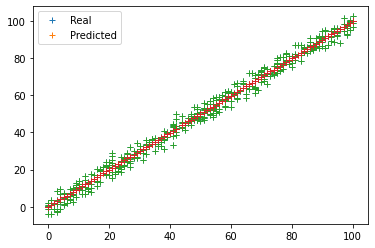

Iteratio = 25, Loss = 3.9226990361664975


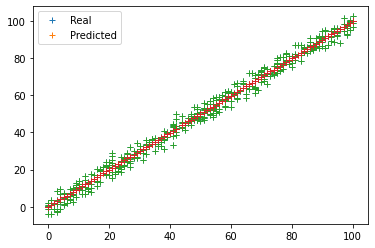

In [13]:
parameters, loss = train(x_train,y_train, 0.0001, 25)

In [14]:
parameters

{'m': 0.9962386511598809, 'c': 0.07691161729640174}

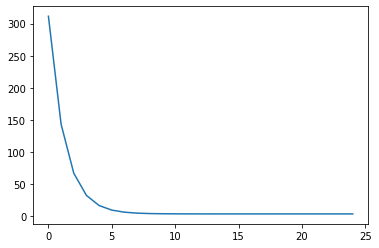

In [15]:
plt.plot(loss)

## Let'S Predict

In [16]:
pred_test = x_test * parameters['m'] + parameters['c']

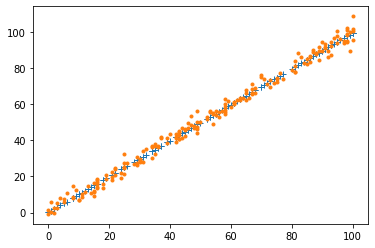

In [17]:
plt.plot(x_test,pred_test,'+')
plt.plot(x_test,y_test,'.')
plt.show()

## Error

In [18]:
cost_function(y_test, pred_test)

3.993033912333616

## With Scilit-Learn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [21]:
lr.coef_

array([[1.0009993]])

In [22]:
lr.intercept_

array([-0.23603461])

In [23]:
pred = lr.predict(x_test)

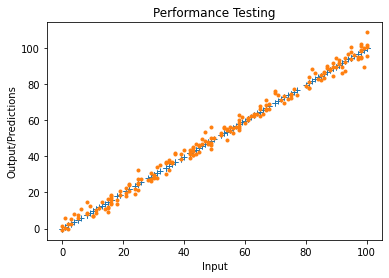

In [24]:
plt.plot(x_test,pred,'+')
plt.plot(x_test,y_test,'.')
plt.xlabel('Input')
plt.ylabel('Output/Predictions')
plt.title('Performance Testing')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, pred)
cost

8.030031591835375

In [26]:
## With the inbuilt cost function
cost_ = cost_function(y_test, pred)
cost_

4.015015795917687

## My inbult model is giving better result